### 몬테카를로 시뮬레이션
   - 적분 등의 수학식 or 파생상품의 가치 계산할 때 유연한 수치 해석 방법론
   - But, 상대적으로 계산 부담 큼

# 10.2.1 확률 변수

$S_t = S_0 e^{((r - {1 \over 2} \sigma^2)T + \sigma \sqrt{T} z)}$
   - St : T시점에서의 주가
   - r : 무위험 이자율
   - sig : 주가 S에 대한 고정 변동성(수익률의 표준편차)
   - z : 표준정규분포를 따르는 확률 변수

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
S0 = 100
r = 0.05
sig = 0.25
T = 2.0
i = 10000 # 난수 개수
ST1 = S0 * np.exp((r - 0.5 * sig ** 2) * T
                 + sig * np.sqrt(T) * npr.standard_normal(i))

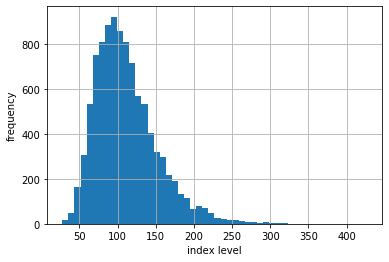

In [3]:
plt.hist(ST1, bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [4]:
# 로그 정규분포로 정의된 확률 변수 분포
ST2 = S0 * npr.lognormal((r - 0.5 * sig ** 2) * T,
                        sig * np.sqrt(T), size = i)

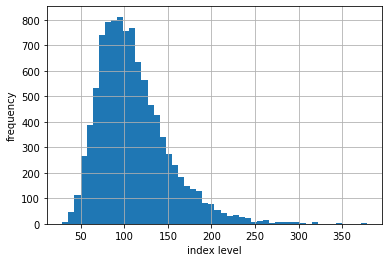

In [5]:
plt.hist(ST2, bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [6]:
import scipy.stats as scs

In [7]:
def print_statistics(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print("%14s %14s %14s" % ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f" % ('skw', sta1[4], sta2[4]))
    print("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

In [8]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.471         28.752
           max        426.250        378.139
          mean        111.236        110.229
           std         40.755         40.710
           skw          1.137          1.246
      kurtosis          2.239          2.681


정규분포 와 로그 정규분포 시뮬레이션 결과의 통계치가 거의 유사
   - 오차 : 샘플링 오차

# 10.2.2 확률 과정

In [ ]:
# 금융에서 대부분의 확률 과정 : 다음 값이 바로 전의 과거 값에만 의존, 
# 더 이전의 값이나 전체 경로에는 의존 X -> MARKOV 특성을 가지는 확률 과정 : 무기억성 확률 과정

## 1. 기하 브라운 운동 모형
- 블랙 숄즈 머튼 모형의 확률 미분 방적식 
 - $dS_t = r S_t dt + \sigma S_t dZ_t$

- 블랙 숄즈 머튼 모형을 따르는 동적인 주가 시뮬레이션
 - $S_t = S_{(t-Δt)} e^{((r - {1\over2} \sigma^2) Δt + \sigma \sqrt{Δt}z_t)}$

In [9]:
i = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, i))
S[0] = S0

for t in range(1, M +1):
    S[t] = S[t-1] * np.exp((r - 0.5 * sig ** 2) * dt + sig * np.sqrt(dt) * npr.standard_normal(i))

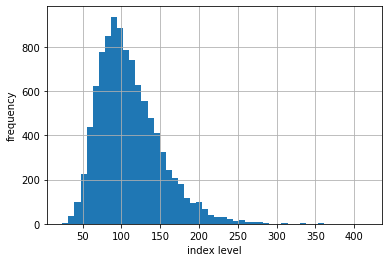

In [10]:
plt.hist(S[-1], bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [11]:
S

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [ 95.61649787,  95.1299381 , 101.21018484, ..., 104.151498  ,
         95.83304989,  92.69434667],
       [ 91.68389009,  96.53882447, 102.20964868, ..., 100.87187063,
         91.70187852, 102.45876434],
       ...,
       [114.16005289, 104.3297095 ,  98.14479566, ..., 111.67001113,
         79.65166739, 211.44600362],
       [121.78492213, 108.54170537,  93.97778847, ..., 114.53604961,
         69.38680052, 189.25520069],
       [120.29084802, 112.89957647,  91.22803383, ..., 111.65734329,
         72.93639512, 179.69831653]])

In [12]:
S[-1]

array([120.29084802, 112.89957647,  91.22803383, ..., 111.65734329,
        72.93639512, 179.69831653])

In [13]:
len(S[-1])

10000

In [14]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         23.708         28.752
           max        416.047        378.139
          mean        110.296        110.229
           std         40.288         40.710
           skw          1.127          1.246
      kurtosis          2.424          2.681


이 통계치도 정적 시뮬레이션 방식에서 나온 값과 거의 일치

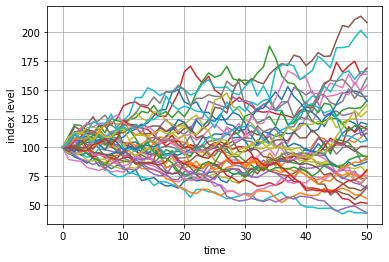

In [15]:
plt.plot(S[:, :40], lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

동적 시뮬레이션 사용 -> 경로 시각화 가능 and pay-off가 경로 의존적인 옵션가격도 계산 가능

즉, 모든 동적 특성 고려가능하다

## 2. 제곱근 확산 모형 ( CIR 모형 - 이자율 모형 )
- 제곱근 확산 확률 미분 방정식
 - $dx_t = \kappa(\theta-x_t)dt + \sigma \sqrt{x_t} dZ_t$
    - $x_t$ : t시점에서의 확률 과정 값 & 카이 제곱 분포 따름
    - $\kappa$ : 평균 회귀 계수
    - $\theta$ : 확률 과정의 장기 평균
    - $\sigma$ : 고정 변동성
    - Z : 표준 브라운 운동

### 오일러 방법을 통한 이산화  : 기하 브라운 운동 모형에만 적용 가능 & 다른 확률 과정에서는 편향 오차 갖는다
 - s ≡ t - Δt & $x^+$ ≡ max(x,0) 으로 정의
 -> 
 
   - 제곱근 확산 과정에서 $x_t$값이 항상 양수 But, 오일러 방식으로 이산화 -> 음수가 될 가능성 O -> maximum 사용해서 양수만 취하자

 - 제곱근 확산 확률 과정의 오일러 이산화
  - $\bar x_t = x_s + \kappa(\theta - x^+_s)Δt + \sigma\sqrt{x^+_s}\sqrt{Δtz_t}$
  - $x_t = x^+_t$

In [16]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sig = 0.1

In [17]:
i = 10000
M = 50
dt = T / M

In [18]:
def srd_euler():
    xh = np.zeros((M + 1, i))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
                + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
                + sig * np.sqrt(np.maximum(xh[t - 1],0)) * np.sqrt(dt) * npr.standard_normal(i))
    
    x1 = np.maximum(xh, 0)
    return x1

In [19]:
x1 = srd_euler()

In [20]:
x1

array([[0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.04812892, 0.04451409, 0.04628961, ..., 0.04740249, 0.04826098,
        0.04850874],
       [0.04316141, 0.04160871, 0.04064842, ..., 0.04223683, 0.04198205,
        0.05032087],
       ...,
       [0.01811408, 0.01714959, 0.01330986, ..., 0.01679626, 0.02020671,
        0.019109  ],
       [0.01893013, 0.01278564, 0.01678453, ..., 0.01789142, 0.01879003,
        0.02113181],
       [0.01513706, 0.01559744, 0.02104115, ..., 0.02141327, 0.02013207,
        0.02499866]])

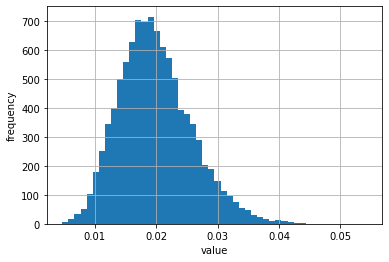

In [21]:
plt.hist(x1[-1], bins = 50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

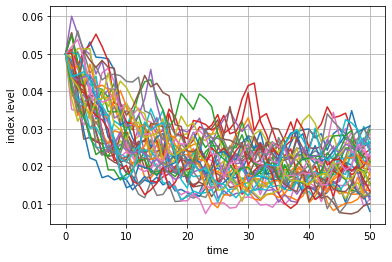

In [22]:
# 시뮬레이션 경로
plt.plot(x1[:, :40], lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

초기 값(x0)이 0.05, 장기 평균(theta)이 0.02이므로 표류 경향이 음수 & 점차 장기 평균으로 수렴

### 정확한 이산화
자유도 : df = ${4\theta \kappa \over \sigma^2}$

비중심 인수 : nc = ${4\kappa e^{-\kappaΔt} \over \sigma^2(1-e^{-\kappaΔt})}x_s$
를 가진 비중심 카이 제곱 분포로 표현

$x_t = {\sigma^2(1-e^{\kappaΔt}) \over 4\kappa}X^2_d({4\kappa e^{-\kappaΔt} \over \sigma^2(1-e^{-\kappaΔt})}x_s)$

In [23]:
def srd_exact():
    x2 = np.zeros((M + 1, i))
    x2[0] = x0
    
    for t in range(1, M + 1):
        df = 4 * theta * kappa / (sig ** 2)
        c = (sig ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1]
        x2[t] = c * npr.noncentral_chisquare(df, nc, size = i)
    return x2

In [24]:
x2 = srd_exact()

In [25]:
x2

array([[0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.04516838, 0.04072921, 0.04747357, ..., 0.04868264, 0.04863188,
        0.04662053],
       [0.04742127, 0.03839643, 0.04458494, ..., 0.04279597, 0.04198214,
        0.0443569 ],
       ...,
       [0.02944272, 0.02994801, 0.02743356, ..., 0.02219619, 0.01459517,
        0.01957844],
       [0.02552855, 0.0324562 , 0.02732224, ..., 0.02307039, 0.01655766,
        0.0206254 ],
       [0.03115807, 0.03338015, 0.02603985, ..., 0.02219936, 0.01544759,
        0.01920524]])

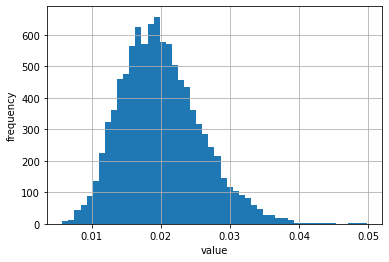

In [26]:
plt.hist(x2[-1], bins = 50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

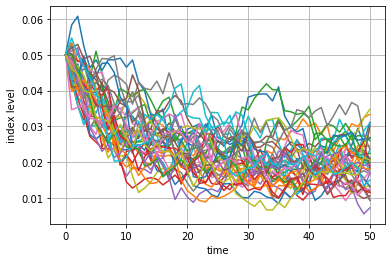

In [27]:
plt.plot(x2[:, :40], lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [28]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.006
           max          0.054          0.050
          mean          0.020          0.020
           std          0.006          0.006
           skw          0.565          0.569
      kurtosis          0.504          0.479


통계치로 볼때 오일러 방법도 괜찮은 성능을 보인다

In [29]:
i = 250000
%time x1 = srd_euler()

Wall time: 2.2 s


In [30]:
%time x2  = srd_exact()

Wall time: 4.32 s


In [31]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.003
           max          0.057          0.060
          mean          0.020          0.020
           std          0.006          0.006
           skw          0.560          0.581
      kurtosis          0.497          0.513


오일러 방법과 정확한 이산화 방식이 거의 동일한 결과를 내지만 후자의 경우가 시간이 더 오래 걸린다

## 3. 확률적 변동성 모형 ( 헤스톤 모델 )
 - 헤스톤 확률적 변동성 모형의 확률 미분 방정식 
    - $dS_t = rS_tdt + \sqrt {v_t} S_tdZ^1_t$ -> 기하 브라운 운동 모형 기반
    - $dv_t = \kappa v(\theta_v - v_t)dt + \sigma_v$ -> 제곱근 확산 모형 기반
 
 
 - $dZ^1_tdZ^2_t = \rho$
     - $Z^1_t, Z^2_t$ : 브라운 운동
     - $\rho : Z^1_t, Z^2_t$의 순간 상관계수 -> 시장 하락시 변동성 증가, 시장 상승시 변동성 감소. 즉, 레버리지 효과 설명 가능

In [32]:
s0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sig = 0.1
rho = 0.6
t = 1.0

In [33]:
# 상관계수 구하기
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

쇼레스키 분해
https://ko.wikipedia.org/wiki/%EC%88%84%EB%A0%88%EC%8A%A4%ED%82%A4_%EB%B6%84%ED%95%B4

In [34]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [35]:
M = 50
i = 10000
ran_num = npr.standard_normal((2, M + 1, i))

# 집합 0 : 주가 확률 과정
# 집합 1 : 변동성 확률 과정

In [36]:
ran_num[0]

array([[-0.35330501,  1.09410414,  0.36339971, ..., -0.29621827,
         0.00248237, -0.61708825],
       [-0.02037481,  0.98338736, -0.11122972, ...,  0.52173872,
         1.93459693,  0.23496198],
       [ 0.73127182, -0.61645927, -1.53666951, ..., -0.4625724 ,
         0.41743607,  0.56418522],
       ...,
       [-0.13524561,  1.03537115, -0.26496021, ...,  0.49808192,
        -1.82613941, -1.82705724],
       [ 0.39996442, -0.71271615, -0.4008687 , ..., -0.16965341,
        -0.36938066,  2.02078484],
       [-0.26819608, -1.05370469,  1.22919707, ...,  1.0726477 ,
        -1.58729427,  1.87270363]])

In [37]:
# 변동성 과정 : 오일러 이산화 방법 사용
dt = t / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0

for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1],0)) * dt
            + sig * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt) * ran[1])

v = np.maximum(vh, 0)

In [38]:
S = np.zeros_like(ran_num[0])
S[0] = s0

for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                            np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

왜 오일러 이산화 방식 사용? 오일러 방식 : 표준정규분포 사용 -> 샘플 생성시 상관관계를 일관적으로 적용 가능

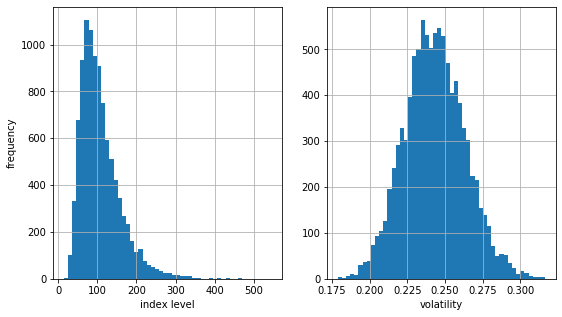

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9,5))
ax1.hist(S[-1], bins = 50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins = 50)
ax2.set_xlabel('volatility')
ax2.grid(True)

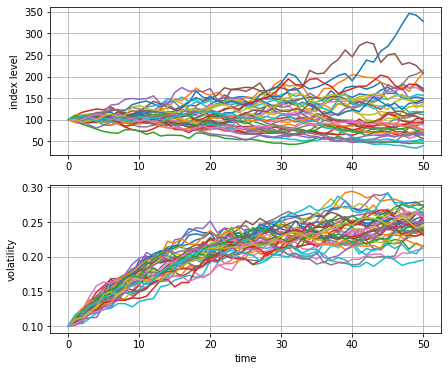

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (7,6))
ax1.plot(S[:, :40], lw = 1.5)
ax1.set_ylabel('index level')
ax1.grid(True)
ax2.plot(v[:, :40], lw = 1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

변동성 과정은 양의 표류 경향, theta값인 0.25로 수렴한다

In [41]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         13.591          0.179
           max        545.189          0.316
          mean        107.885          0.243
           std         52.149          0.020
           skw          1.592          0.167
      kurtosis          4.521          0.027


주가과정의 최대값이 기하 브라운 운동 모평보다 크다 -> 변동성이 고정값이 아닌 지속적으로 증가했기때문

## 4. 점프 확산
 - 머튼의 점프 확산 모형의 확률 미분 방정식
  - $dS_t = (r - r_J)S_tdZ_t + J_tS_tdN_t$
    - S_t : 시점 t에서의 주가
    - r : 무위험 단기 이자율
    - $r_J ≡ \lambda(e^{(\mu_J+{\sigma^2 \over 2})}-1)$ : 점프의 위험 중립성을 보존하기 위한 표류계수 수정항
    - $\sigma$ : S의 고정 변동성
    - $Z_t$ : 표준 브라운 운동
    - $J_t$ : 시점 t에서의 점프
      - $\log(1 + J_t) ∽ N(\log(1 + \mu_J) - {\delta^2 \over 2},\delta^2)$
      - N은 표준정규분포의 누저 분포 함수
    - $N_t$ : 점프강도 $\lambda$를 가지는 포아송 과정

 - 머튼 점프 확산 모형의 오일러 이산화
  - $S_t = S_{t-Δt}(e^{(r-r_f-\sigma^2/2)Δt + \sigma\sqrt{Δt}z^1_t} + (e^{\mu_J + \delta z^2_t} - 1) y_t)$
    - $z^n_t$ : 표준정규분포
    - $y_t$ : 인수 $\lambda$를 가지는 포아송 분포

In [57]:
s0 = 100.
r = 0.05
sig = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
t = 1.0

In [58]:
M = 50
i = 10000
dt = t / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, i))
S[0] = s0
sn1 = npr.standard_normal((M + 1, i))
sn2 = npr.standard_normal((M + 1, i))
poi = npr.poisson(lamb * dt, (M + 1, i))

for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sig ** 2) * dt + sig * np.sqrt(dt) * sn1[t])
                      + (np.exp(mu + delta * sn2[t]) -1) * poi[t])
    S[t] = np.maximum(S[t], 0)

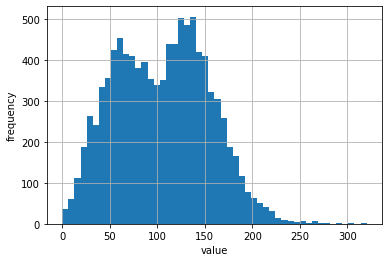

In [59]:
plt.hist(S[-1], bins = 50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

점프의 평균값(mu)에 대해 음수로 가정 -> 로그 정규분포보다 right-skewed

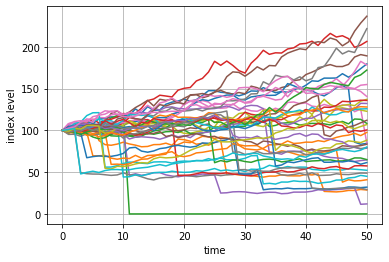

In [60]:
plt.plot(S[:, :40], lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

# 10.2.3 분산 감소

In [61]:
print("%15s %15s" % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * 10000)
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [62]:
i ** 2 * 10000

8410000

난수의 개수가 8000000개가 넘는 샘플에서도 평균 : 0, 표준편차 : 1의 수준에 도달 X

#### 1. 대조 변수 사용
 - 난수를 원하는 수 절반만 생성 -> 생성된 숫자의 부호를 반대로한 난수 추가 ex) 0.5 생성 -> -0.5 추가
 - numpy에서 concatenate 함수사용

In [63]:
sn = npr.standard_normal(int(10000/2))
sn = np.concatenate((sn, -sn))
np.shape(sn)

(10000,)

In [64]:
print("%15s %15s" % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(int(i ** 2 * 10000/2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


1차 모멘트(평균)가 정확히 0에 맞춰진다

but, 이 방법은 표준정규분포 확률 변수처럼 중간값이 0인 대칭 확률 변수에만 적용가능 & 2차 모멘트(표준편차)에는 영향 X

#### 2. 모멘트 정합
 - -> 1차, 2차 모멘텀 모두 수정 가능

In [65]:
sn = npr.standard_normal(10000)
print(sn.mean())
print(sn.std())

-0.001165998295162494
0.991255920204605


In [66]:
sn_new = (sn - sn.mean()) / sn.std()
print(sn_new.mean())
print(sn_new.std())

-2.3803181647963357e-17
0.9999999999999999


모든 난수에서 샘플 평균을 빼고 샘플 표준편차로 나누면 표준정규분포의 1차, 2차 모멘트를 거의 정확하게 만족시키는 난수 집합 구할 수 있다.

In [67]:
# 함수로 만들어 보기
def gen_sn(M, i, anti_paths = True, mo_match = True):
    
    if anti_paths == True:
        sn = npr.standard_normal((M + 1, int(i/2)))
        sn = np.concatenate((sn, -sn), axis = 1)
    
    else:
        sn = npr.standard_normal((M + 1, i))
    
    if mo_match == True:
        sn = (sn - sn.mean()) / sn.std()
    
    return sn

In [68]:
gen_sn(50, 10000, anti_paths = True,mo_match = False)

array([[ 0.83347883,  1.02436922,  0.1583836 , ...,  1.85112092,
         0.41776194, -0.15699001],
       [ 0.17561857,  0.46866213, -0.06640856, ..., -0.50769535,
        -0.98454619,  0.12629943],
       [-1.96638425,  1.47602123,  0.24281616, ...,  0.02470352,
         1.25373903,  0.82267191],
       ...,
       [ 0.77015704, -0.17377711, -0.14261796, ...,  0.2105273 ,
        -0.07334859,  0.94861622],
       [ 0.09202788, -0.82584586, -0.93826158, ...,  0.91850809,
         0.38796125,  0.97459475],
       [-0.6172886 ,  0.08125373,  0.01775667, ...,  0.05212759,
        -1.30004972, -0.95999967]])